In [408]:
from os import listdir
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# The relative path to your CAFE-Gamma dataset
data_dir = "./CAFE/"

# Dictionary of semantic "label" to emotions
emotion_dict = {
    "h": "happy", "ht": "happy with teeth", "m": "maudlin", 
    "s": "surprise", "f": "fear", "a": "anger", "d": "disgust", "n": "neutral"
}

emotion_index = {
    "h": 0, "ht": 1, "m": 2, "s": 3, "f": 4, "a": 5, "d": 6, "n": 7
}

In [409]:
def load_data(data_dir="./CAFE/"):
    """ Load all PGM images stored in your data directory into a list of NumPy
    arrays with a list of corresponding labels.

    Args:
        data_dir: The relative filepath to the CAFE dataset.
    Returns:
        images: A list containing every image in CAFE as an array.
        labels: A list of the corresponding labels (filenames) for each image.
    """
    # Get the list of image file names
    all_files = listdir(data_dir)

    # Store the images as arrays and their labels in two lists
    images = []
    labels = []

    for file in all_files:
        # Load in the files as PIL images and convert to NumPy arrays
        img = Image.open(data_dir + file)
        images.append(np.array(img))
        labels.append(file)

    print("Total number of images:", len(images), "and labels:", len(labels))

    return images, labels


def display_face(img):
    """ Display the input image and optionally save as a PNG.

    Args:
        img: The NumPy array or image to display

    Returns: None
    """
    # Convert img to PIL Image object (if it's an ndarray)
    if type(img) == np.ndarray:
        print("Converting from array to PIL Image")
        img = Image.fromarray(img)

    # Display the image
    img.show()

In [220]:
A = {'h':0, 'a':4}
len(A)

2

## Proprocessing Dataset

In [244]:
Img, Lbl = load_data()

Total number of images: 80 and labels: 80


In [263]:
A = [10,]*10
print(A)

print(A*0.3)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


TypeError: can't multiply sequence by non-int of type 'float'

In [398]:
class DataSet:
    D = []
    N = 0
    
    label_indice_table = {}
    class_catagory_distrb = []
    
    def __init__(self, Img, Lbl):
        self.label_indice_table.clear()
        self.class_catagory_distrb.clear()
        
        for img, lbl in zip(Img, Lbl):
            lbl = lbl.split('.')[0].split('_')[1][:-1]
            if lbl not in self.label_indice_table: 
                self.label_indice_table[lbl] = len(self.label_indice_table)
                self.class_catagory_distrb.append(1)
            else:
                self.class_catagory_distrb[self.label_indice_table[lbl]] += 1
            self.D.append((img, lbl))
        
        self.N = len(self.D)
        self.class_catagory_distrb = np.array(self.class_catagory_distrb, dtype=np.int32)
        
    def train_test_split(self, split_ratio, is_valid=False, valid_ratio=.0):
        if not split_ratio or split_ratio >= 1 or split_ratio <=0:
            return self.D
        
        split_ratio = int(100 * np.round(split_ratio, 2))
        train = self.class_catagory_distrb * split_ratio // 100
        test = self.class_catagory_distrb - train
        valid = self.class_catagory_distrb * 0
        
        if is_valid:
            valid_ratio = int(100 * np.round(valid_ratio, 2))
            if valid_ratio + split_ratio < 100: 
                valid = self.class_catagory_distrb * valid_ratio // 100
                test -= valid
            
        print(train, test, valid)
        
        d1, d2, d3 = [], [], []
        np.random.shuffle(self.D)
        for d in self.D:
            # d = (dat, lbl) -> d[0]: dat, d[1]: lbl
            cidx = self.label_indice_table[d[1]]
#             print(cidx, train, test, valid)
            if train[cidx]:
                train[cidx] -= 1
                d1.append(d)
            elif test[cidx]:
                test[cidx] -= 1
                d2.append(d)
            elif valid[cidx]:
                valid[cidx] -= 1
                d3.append(d)
                
        return d1, d2, d3
        
        

In [399]:
D = [(1,'a'), (2,'b'), (3,'c')]
np.random.shuffle(D)
D

[(1, 'a'), (3, 'c'), (2, 'b')]

In [406]:
D = DataSet(Img, Lbl)

d1, d2, d3 = D.train_test_split(0.8, is_valid=True, valid_ratio=0.1)

len(d1), len(d2), len(d3)

[8 8 8 8 8 8 8 8] [1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1]


(64, 8, 8)

In [407]:
d1[0]

(array([[141, 125, 109, ..., 121, 113, 108],
        [134, 119, 110, ..., 125, 121, 119],
        [124, 113, 107, ..., 127, 123, 119],
        ...,
        [198, 198, 197, ..., 190, 190, 191],
        [198, 197, 197, ..., 190, 190, 190],
        [197, 197, 197, ..., 190, 190, 190]], dtype=uint8), 'n')

In [403]:
d1[0]

(array([[ 91,  90,  89, ...,  91,  90,  90],
        [ 91,  90,  89, ...,  90,  89,  88],
        [ 90,  89,  89, ...,  89,  89,  89],
        ...,
        [190, 190, 189, ..., 113, 108, 105],
        [190, 190, 189, ..., 115, 111, 107],
        [191, 190, 190, ..., 118, 112, 109]], dtype=uint8), 's')

In [320]:
D = DataSet(Img, Lbl)

int(np.round(0.23423, 2) * 100)

23

In [325]:
D.train_test_split(0.5, valid=True, valid_ratio=0.5)

[5 5 5 5 5 5 5 5] [5 5 5 5 5 5 5 5] [0 0 0 0 0 0 0 0]


In [286]:
D.class_catagory_distrb * 

array([10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [4]:
D = []
for img, lbl in zip(Img, Lbl):
    lbl = lbl.split('.')[0].split('_')[1][:-1] 
    if lbl=='ht' or lbl=='n': continue
    
    D.append((img, lbl))
    
len(D)

60

In [214]:
def get_dataset_distrib(D):
    labels = {}
    for d in D:
        if d[1] not in labels:
            labels[d[1]] = 1
        else:
            labels[d[1]] += 1 
    
    return labels
   
def train_test_split(D):
    l = get_dataset_distrib(D)
    Dtrain, Dvalid, Dtest = [], [], []
    for img, lbl in D:
        img = img.reshape((91200,))
        if l[lbl] > 2: 
            Dtrain.append((img, lbl)) 
            l[lbl] -= 1
        elif l[lbl] > 1:
            Dvalid.append((img, lbl)) 
            l[lbl] -= 1
        else:
            Dtest.append((img, lbl))
            
    return Dtrain, Dvalid, Dtest

def display_faces(d):
    N, d = 

In [215]:
d1, d2, d3 = train_test_split(D)

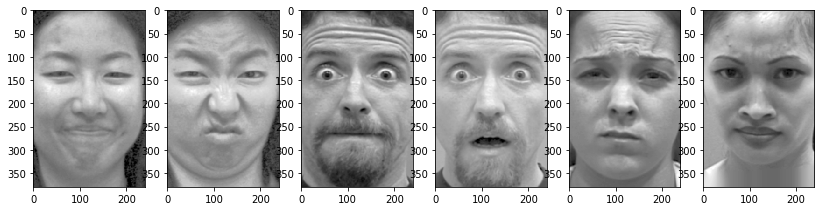

In [7]:
plt.figure(figsize=(14,8))
for k in range(len(d2)):
    plt.subplot(1,6,k+1)
    plt.imshow(d2[k][0], 'gray')
    
plt.show()

In [128]:
## A = data.T
data = np.array([img.reshape((91200,)) for img, lbl in d1], dtype=np.float64)  

In [129]:
def PCA(data, dims_rescaled_data=10):
    data -= data.mean(axis=0)
    R = np.cov(data, rowvar=True)
    evals, evecs = np.linalg.eigh(R)
    
    evals = evals[-1:-1-dims_rescaled_data:-1]
    evecs = evecs[:, -1:-1-dims_rescaled_data:-1]
    
    evecs = np.dot(data.T, evecs)
    evecs /= np.linalg.norm(evecs, axis=0)
    
    return np.dot(data, evecs), evals, evecs.T

In [130]:
def display_eigengface(data):
    n = len(data)
    plt.figure(figsize=(14,8))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(data[i,:].reshape((380,240)), 'gray')
        
    plt.show()

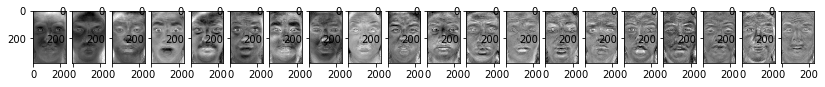

In [131]:
data_projected, evals, evecs = PCA(data, 20)
display_eigengface(evecs)

In [133]:
data_projected.shape, evals.shape, evecs.shape

((48, 20), (20,), (20, 91200))

In [213]:
# generate the required training dataset
d1

[(array([[ 85,  79,  79, ..., 131, 134, 134],
         [ 79,  80,  80, ..., 127, 127, 129],
         [ 85,  83,  80, ..., 124, 123, 122],
         ...,
         [157, 158, 159, ..., 179, 182, 184],
         [157, 158, 158, ..., 178, 181, 184],
         [156, 157, 158, ..., 176, 180, 183]], dtype=uint8), 'm'),
 (array([[114, 114, 114, ..., 123, 126, 127],
         [114, 115, 116, ..., 119, 121, 124],
         [114, 114, 116, ..., 120, 121, 121],
         ...,
         [161, 160, 159, ..., 224, 227, 224],
         [160, 160, 159, ..., 229, 233, 232],
         [160, 160, 159, ..., 236, 236, 232]], dtype=uint8), 'a'),
 (array([[ 79,  81,  81, ...,  75,  77,  77],
         [ 73,  77,  80, ...,  98,  95,  88],
         [ 66,  76,  80, ..., 122, 118, 112],
         ...,
         [138, 138, 138, ..., 121, 123, 124],
         [137, 137, 137, ..., 121, 122, 125],
         [134, 134, 136, ..., 121, 122, 125]], dtype=uint8), 'm'),
 (array([[65, 61, 67, ..., 69, 69, 73],
         [61, 61, 63, ..., 

## Logical Regression

### Logistic Regression via Gradient Descend

In [172]:
np.exp(np.array([[1],[1]]))

W = np.random.rand(10)
x = np.random.rand(10)
b = np.random.rand(1)

h = np.dot(W.T, x) + b
print(h)
g = np.exp(-h) + 1
print(g)
g = 1/g
print(g)

[3.62182721]
[1.02673378]
[0.9739623]


In [205]:
A = []
A.append(12)
print(A)

A.clear()
print(A)

[12]
[]


In [209]:
## Model Definition
'''
model = (W, b)
    W: weights
    b: bias

loss = E(W, b)



y1 = logical(x)
y0 = 1 - logical(x)

'''
class model:
    W, b = np.array([]), np.array([])
    
    data = [] # accept data format: [(dat, lbl) * N] and dat should be a d-dimensional ROW sample 
    N, d = 0, 0
    
    current_batch_idx = 0
    batch_size = 10
    
    loss = []
    accuracy = []
    
    
    def __init__(self, data):
        try:
            self.data = data
            self.N= len(data)
            self.d = len(data[0][0])
        except:
            print('Initilization Error')
            
        # initilzie the model parameters
        self.W = np.random.rand(d)
        self.b = np.random.rand(1)
        
        # clear the loss and accuracy list
        self.loss.clear()
        self.accuracy.clear()
        
        
    def logical(self, x):
        # h(x)
        h = np.dot(self.W.T, x) + self.b
        # g(x)
        g = np.exp(-h) + 1
        
        return 1. / g
    
    
    def cross_entropy(self):
        loss = 0
        for dat, lbl in self.data:
            y = self.logical(dat)
            if lbl: loss -= np.log(y)
            else: loss -= np.log(1-y)
        
        return loss
    
    def calc_accuracy(self):
        correct = 0
        for dat, lbl in self.data:
            if np.round(self.logical(dat)) == lbl: 
                correct += 1
        
        return correct / self.N
    
    def gradient_descend(self):
        # detW
        detW = np.zeros(self.d, dtype=np.float64)
        for dat, lbl in self.data:
            y = self.logical(dat)
            detW -= (lbl - y) * dat
            
        # detb left 
        detb = np.array([0], dtype=np.float64)
            
        self.W += detW
        self.b += detb
        
    def batch_gradient_descend(self):
        detW = np.zeros(self.d, dtype=np.float64)
        for k in range(self.batch_size):
            # calculate the gradient
            dat, lbl = self.data[self.current_batch_idx]
            y = self.logical(dat)
            detW -= (lbl - y) * dat
            
            # update the current idx
            self.current_batch_idx += 1
            self.current_batch_idx %= (self.N - 1)
        
        detb = np.array([0])
        
        self.W += detW
        self.b += detb
        
        
    def train(epoch=10, use_batch=False, batch_size=10):
        if use_batch:
            gradient = self.batch_gradient_descend
            self.batch_size = batch_size
        else: 
            gradient = self.gradient_descend
            
        for e in range(epoch): 
            gradient()
            self.loss.append(self.cross_entropy() )
            self.accuracy.append(self.calc_accuracy() )
        
        return self.loss, self.accuracy
        
#     def valid():
        
        
#     def predict():
    

In [208]:
np.zeros(10) -  np.random.rand(10)

array([-0.47399149, -0.36584987, -0.33206245, -0.27212346, -0.18405491,
       -0.85109213, -0.96743732, -0.12613495, -0.86824736, -0.83920839])

## Softmax Regression

In [ ]:
50

0-49



In [190]:
34 % (20-1)   

15